## Trending YouTube Video Statistics
#### Daily statistics for trending YouTube videos
-----------

### Step 1. Data Load & EDA

In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('./data/KRvideos.csv', engine='python')
# if error occurs like -> "utf-8" codec can"t decode bytes in position 00000-00000: unexpected end of data
# add parameter -> engine="python"

In [10]:
df.head()

video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          Ï¢ãÏïÑ by ÎØºÏÑú_Ïú§Ï¢ÖÏã†_Ï¢ãÎãà ÎãµÍ∞Ä        ÎùºÌë∏ÎßàÏΩîÎ¶¨ÏïÑ   
1  hH7wVE8OlQ0      17.14.11            JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ        Edward   
2  9V8bnWUmE9U      17.14.11  ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ïö¥ÎèôÌôî ÏòÅÏÉÅ 2ÌÉÑ (ÎπºÎπºÎ°úÎç∞Ïù¥Î≤ÑÏ†º)     ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ìï´Ïáº   
3  0_8py-t5R80      17.14.11  Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ ÌòÑÏû•, ÎÜìÏπòÎ©¥ ÏïàÎêòÎäî Ïû•Î©¥         ÎØ∏ÎîîÏñ¥Î™ΩÍµ¨   
4  bk55RbxiQdI      17.14.11     ÍπÄÏû•Í≤∏ÏùÄ Î¨ºÎü¨Í∞îÎã§ MBC ÎÖ∏Ï°∞ ÌôòÌò∏ÏôÄ ÎààÎ¨º        NocutV   

   category_id              publish_time  \
0           22  2017-11-13T07:07:36.000Z   
1           25  2017-11-13T10:59:16.000Z   
2           22  2017-11-11T07:16:08.000Z   
3           25  2017-11-12T11:19:52.000Z   
4           25  2017-11-13T11:08:59.000Z   

                                                tags   views  likes  dislikes  \
0                      ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú"  156130   1422        40   
1        JSA|"Í∑ÄÏàú"|"Î∂ÅÌïúÍµ∞"|"Ï¥ùÍ≤©"|"Î∂ÄÏÉÅ"|"JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ"   76533    211        28   
2                ÏïÑÎîîÎã§Ïä§|"ÎπºÎπºÎ°ú"|"Ìï´Ïáº"|"ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨"|"ÎåÄÌïôÎ°ú"|"Í≥µÏó∞"  421409   5112       166   
3  Ïù¥Î™ÖÎ∞ï|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠Í∏àÏßÄ"|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ÌòÑÏû•"|"Ïù¥Î™ÖÎ∞ï Î∞îÎ†àÏù∏"|"Ïù¥Î™ÖÎ∞ï ÎåÄÌÜµÎ†π"|...  222850   2093       173   
4          nocutV|"ÎÖ∏Ïª∑V"|"CBS"|"mbc"|"ÍπÄÏû•Í≤∏"|"Ìï¥ÏûÑ"|"ÌóàÏùºÌõÑ"   84466   1094       109   

   comment_count                                  thumbnail_link  \
0            272  https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg   
1            113  https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg   
2            459  https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg   
3           1219  https://i.ytimg.com/vi/0_8py-t5R80/default.jpg   
4            450  https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....  
1  [Ï±ÑÎÑêAÎã®ÎèÖ]Âåó Î≥ëÏÇ¨ ÌòÑÏû¨ 'ÏùòÏãùÎ∂àÎ™Ö'‚Ä¶ ÌòàÏïï Îñ®Ïñ¥ÏßÄÎäî Ï§ë \n[Ï±ÑÎÑêAÎã®ÎèÖ]Ïö∞Î¶¨Ï∏° ...  
2                                    ÌçºÍ∞ÄÏã§Îïå Íº≠ Ï∂úÏ≤ò Î∂ÄÌÉÅÎìúÎ†§Ïöî  
3                                Îã§Ïä§Îäî ÎàÑÍµ¨Í≤ÅÎãàÍπå Îì£Í≥† ÎÇú ÌõÑ ÌëúÏ†ï  
4  ÍπÄÏû•Í≤∏ MBC ÏÇ¨Ïû•Ïù¥ Í≤∞Íµ≠ Ìï¥ÏûÑÎêêÎã§.\n\nMBC ÎåÄÏ£ºÏ£ºÏù∏ Î∞©ÏÜ°Î¨∏ÌôîÏßÑÌù•ÌöåÎäî 13Ïùº ...

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [12]:
df.describe()

category_id         views         likes      dislikes  comment_count
count  34567.000000  3.456700e+04  3.456700e+04  3.456700e+04   3.456700e+04
mean      21.137675  4.249473e+05  1.218642e+04  5.390980e+02   2.025383e+03
std        6.675455  2.430637e+06  1.170531e+05  1.370852e+04   2.150677e+04
min        1.000000  2.050000e+03  0.000000e+00  0.000000e+00   0.000000e+00
25%       22.000000  4.776850e+04  4.120000e+02  2.100000e+01   1.050000e+02
50%       24.000000  1.114960e+05  1.389000e+03  6.500000e+01   3.450000e+02
75%       25.000000  2.788665e+05  3.704500e+03  1.750000e+02   9.290000e+02
max       44.000000  1.138762e+08  5.150839e+06  1.470388e+06   1.142274e+06

In [13]:
df.tail()

video_id trending_date                                  title  \
34562  pj6YBBrO1sQ      18.14.06             Ïû•Î™®Îãò Í∞ÄÍ≤åÌïúÎã§Í≥† 1ÏñµÎßå Îã¨ÎùºÎäî ÏïÑÎÇ¥ ÏÇ¨Ïù¥Îã§Ïπ¥ÌÜ°   
34563  _Ne9ER-jr20      18.14.06        Ïó¨Îü¨Î∂Ñ~ Î†åÏ¶àÍ∞Ä Ïù¥Î†áÍ≤å ÏúÑÌóòÌï©ÎãàÎã§!!!„Öú„Öú _[Ïù¥ÏäàÌÖîÎü¨]   
34564  xuOQq_fzEjk      18.14.06                     2018ÎÖÑ 6Ïõî 13Ïùº ÏïÑÏπ® Îâ¥Ïä§   
34565  uXvjxeg08eQ      18.14.06          ÏõåÎÑàÏõê ÏõÉÏùå Ï∞∏Í∏∞ ÏòÅÏÉÅ ÏõåÎÑàÏõê GO X-con.ver   
34566  C-bLqIftDY4      18.14.06  [Î≤ïÎ•úÏä§ÎãòÏùò Ï¶âÎ¨∏Ï¶âÏÑ§ Ï†ú 1398Ìöå] ÏãúÎèôÏÉùÏùò ÏïÑÏù¥Î•º ÌÇ§Ïö∞Í≤å ÎêêÏñ¥Ïöî   

          channel_title  category_id              publish_time  \
34562             Ïù¥ÏäàÌä∏ÎûòÏª§           24  2018-06-10T23:00:01.000Z   
34563  Ïù¥ÏäàÌÖîÎü¨ issueTeller           24  2018-06-12T07:00:06.000Z   
34564      News Express           25  2018-06-12T13:17:29.000Z   
34565                ÏõêÌîå           22  2018-06-11T11:57:20.000Z   
34566        Î≤ïÎ•úÏä§ÎãòÏùò Ï¶âÎ¨∏Ï¶âÏÑ§           29  2018-06-10T20:00:01.000Z   

                                                    tags   views  likes  \
34562                                             [none]  156439    383   
34563                                             [none]  130948   3121   
34564  ÌïúÍµ≠|"Î∂ÅÌïú"|"ÎØ∏Íµ≠"|"Ï§ëÍµ≠"|"ÏùºÎ≥∏"|"Îü¨ÏãúÏïÑ"|"ÌïúÍµ≠Îâ¥Ïä§"|"Îâ¥Ïä§"|"Íµ≠Ï†úÎâ¥Ïä§...   62555    319   
34565  ÏõåÎÑàÏõê|"ÏõåÎÑàÏõê Í≥†"|"ÏõåÎÑàÏõê GO"|"ÏõÉÏùåÏ∞∏Í∏∞"|"ÏõåÎÑàÏõê ÏõÉÏùåÏ∞∏Í∏∞"|"ÏõåÎÑàÏõê Î†àÏ†Ñ...   63306   2369   
34566  Î∂àÍµê|"Ï¶âÎ¨∏Ï¶âÏÑ§"|"Î≤ïÎ•úÏä§Îãò"|"Ï†ïÌÜ†Ìöå"|"buddha"|"buddhism"|"po...   63716    500   

       dislikes  comment_count  \
34562        58            308   
34563        55            988   
34564        71            105   
34565        27            571   
34566        58            135   

                                       thumbnail_link  comments_disabled  \
34562  https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg              False   
34563  https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg              False   
34564  https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg              False   
34565  https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg              False   
34566  https://i.ytimg.com/vi/C-bLqIftDY4/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
34562             False                   False   
34563             False                   False   
34564             False                   False   
34565             False                   False   
34566             False                   False   

                                             description  
34562  - ÎÇ®Ìé∏ÏùÑ ÎèàÏ§ÑÎ°úÎßå Î≥∏ ÏïÑÎÇ¥- Ï¢ãÏïÑÏöîÏôÄ Íµ¨ÎèÖÏùÄ Ïñ∏Ï†úÎÇò ÌôòÏòÅÏûÖÎãàÎã§.- Ïπ¥ÌÜ°ÏãúÎ¶¨Ï¶à- Î™®...  
34563  ÏïàÎÖïÌïòÏÑ∏Ïöî~! Ïù¥ÏäàÌÖîÎü¨ ÏûÖÎãàÎã§~^^Ìôî, Î™© Ïò§ÌõÑ 4Ïãú / ÌÜ†ÏöîÏùº Ïò§Ï†Ñ 9Ïãú Ïû¨Î∞åÍ≥† ...  
34564  2018ÎÖÑ 6Ïõî 13Ïùº ÏïÑÏπ® Îâ¥Ïä§Îì±Î°ùÎêòÏßÄ ÏïäÏùÄ Íµ¨ÎèÖÏûêÍ∞Ä Ïó¨Í∏∞ÏóêÏÑú ÎÇ¥ ÏÉà Ï±ÑÎÑêÏùÑ ÏßÄÏõê...  
34565  ÏõåÎÑàÏõê ÏõÉÏùå Ï∞∏Í∏∞ ÏòÅÏÉÅ Ìï≠ÏÉÅ Ï¢ãÏïÑÌï¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§8„ÖÖ8Ïù¥Î≤àÏóêÎäî ÏñºÎßàÏ†ÑÏóê ÏûàÏóàÎçò Ïõê...  
34566  3ÏõîÏóê ÏãúÎèôÏÉùÏù¥ Ïù¥ÌòºÌñàÏäµÎãàÎã§ Í∑∏Îü¨Î©¥ÏÑú Ï†úÍ∞ÄÏ§ë2, 7ÏÇ¥, 4ÏÇ¥ ÎêòÎäî Ï°∞Ïπ¥Îì§ÏùÑ Îç∞Î¶¨Í≥† ...

In [17]:
df.sort_values(by='likes', ascending=False)[:10]

video_id trending_date  \
30844  7C2z4GqqS5E      18.24.05   
30583  7C2z4GqqS5E      18.23.05   
30352  7C2z4GqqS5E      18.22.05   
30486  7C2z4GqqS5E      18.22.05   
30291  7C2z4GqqS5E      18.21.05   
30171  7C2z4GqqS5E      18.21.05   
30069  7C2z4GqqS5E      18.20.05   
29969  7C2z4GqqS5E      18.20.05   
4856   FlsCjmMhFmw      17.11.12   
4678   FlsCjmMhFmw      17.10.12   

                                                   title      channel_title  \
30844                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV            ibighit   
30583                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV            ibighit   
30352                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV            ibighit   
30486                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV            ibighit   
30291                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV            ibighit   
30171                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV            ibighit   
30069                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV            ibighit   
29969                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV            ibighit   
4856   YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
4678   YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   

       category_id              publish_time  \
30844           10  2018-05-18T09:00:02.000Z   
30583           10  2018-05-18T09:00:02.000Z   
30352           10  2018-05-18T09:00:02.000Z   
30486           10  2018-05-18T09:00:02.000Z   
30291           10  2018-05-18T09:00:02.000Z   
30171           10  2018-05-18T09:00:02.000Z   
30069           10  2018-05-18T09:00:02.000Z   
29969           10  2018-05-18T09:00:02.000Z   
4856            24  2017-12-06T17:58:51.000Z   
4678            24  2017-12-06T17:58:51.000Z   

                                                    tags      views    likes  \
30844  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   87430865  5150839   
30583  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   80738011  5053338   
30352  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   73463137  4924056   
30486  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   73463137  4924056   
30291  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   65396157  4750254   
30171  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   65396157  4750254   
30069  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   62796390  4470923   
29969  BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   62796390  4470923   
4856   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  113876217  2811223   
4678   Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  100911567  2656686   

       dislikes  comment_count  \
30844    172570        1142274   
30583    165854        1114800   
30352    156026        1084435   
30486    156026        1084435   
30291    141966        1040912   
30171    141966        1040912   
30069    119053         905925   
29969    119053         905925   
4856    1470388         787174   
4678    1353663         682890   

                                       thumbnail_link  comments_disabled  \
30844  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
30583  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
30352  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
30486  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
30291  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
30171  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
30069  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
29969  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg              False   
4856   https://i.ytimg.com/vi/FlsC

In [18]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

In [19]:
df['description']

0        Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....
1        [Ï±ÑÎÑêAÎã®ÎèÖ]Âåó Î≥ëÏÇ¨ ÌòÑÏû¨ 'ÏùòÏãùÎ∂àÎ™Ö'‚Ä¶ ÌòàÏïï Îñ®Ïñ¥ÏßÄÎäî Ï§ë \n[Ï±ÑÎÑêAÎã®ÎèÖ]Ïö∞Î¶¨Ï∏° ...
2                                          ÌçºÍ∞ÄÏã§Îïå Íº≠ Ï∂úÏ≤ò Î∂ÄÌÉÅÎìúÎ†§Ïöî
3                                      Îã§Ïä§Îäî ÎàÑÍµ¨Í≤ÅÎãàÍπå Îì£Í≥† ÎÇú ÌõÑ ÌëúÏ†ï
4        ÍπÄÏû•Í≤∏ MBC ÏÇ¨Ïû•Ïù¥ Í≤∞Íµ≠ Ìï¥ÏûÑÎêêÎã§.\n\nMBC ÎåÄÏ£ºÏ£ºÏù∏ Î∞©ÏÜ°Î¨∏ÌôîÏßÑÌù•ÌöåÎäî 13Ïùº ...
                               ...                        
34562    - ÎÇ®Ìé∏ÏùÑ ÎèàÏ§ÑÎ°úÎßå Î≥∏ ÏïÑÎÇ¥- Ï¢ãÏïÑÏöîÏôÄ Íµ¨ÎèÖÏùÄ Ïñ∏Ï†úÎÇò ÌôòÏòÅÏûÖÎãàÎã§.- Ïπ¥ÌÜ°ÏãúÎ¶¨Ï¶à- Î™®...
34563    ÏïàÎÖïÌïòÏÑ∏Ïöî~! Ïù¥ÏäàÌÖîÎü¨ ÏûÖÎãàÎã§~^^Ìôî, Î™© Ïò§ÌõÑ 4Ïãú / ÌÜ†ÏöîÏùº Ïò§Ï†Ñ 9Ïãú Ïû¨Î∞åÍ≥† ...
34564    2018ÎÖÑ 6Ïõî 13Ïùº ÏïÑÏπ® Îâ¥Ïä§Îì±Î°ùÎêòÏßÄ ÏïäÏùÄ Íµ¨ÎèÖÏûêÍ∞Ä Ïó¨Í∏∞ÏóêÏÑú ÎÇ¥ ÏÉà Ï±ÑÎÑêÏùÑ ÏßÄÏõê...
34565    ÏõåÎÑàÏõê ÏõÉÏùå Ï∞∏Í∏∞ ÏòÅÏÉÅ Ìï≠ÏÉÅ Ï¢ãÏïÑÌï¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§8„

<AxesSubplot:>

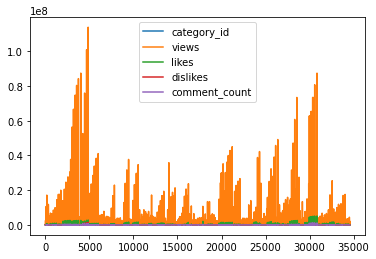

In [20]:
df.plot();

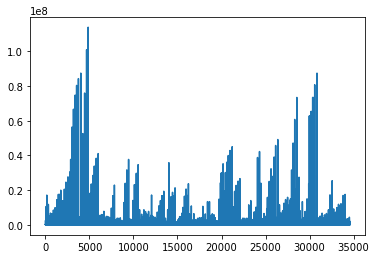

In [22]:
df['views'].plot();

In [23]:
df.corr()

category_id     views     likes  dislikes  \
category_id                1.000000 -0.082367 -0.097976 -0.016725   
views                     -0.082367  1.000000  0.860043  0.581443   
likes                     -0.097976  0.860043  1.000000  0.428036   
dislikes                  -0.016725  0.581443  0.428036  1.000000   
comment_count             -0.065038  0.807600  0.922731  0.555549   
comments_disabled          0.026884 -0.003379 -0.010734 -0.002056   
ratings_disabled           0.054086 -0.019284 -0.021390 -0.008080   
video_error_or_removed    -0.042891 -0.002112 -0.000232 -0.000589   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                 -0.065038           0.026884          0.054086   
views                        0.807600          -0.003379         -0.019284   
likes                        0.922731          -0.010734         -0.021390   
dislikes                     0.555549          -0.002056         -0.008080   
comment_count                1.000000          -0.011536         -0.014295   
comments_disabled           -0.011536           1.000000          0.220468   
ratings_disabled            -0.014295           0.220468          1.000000   
video_error_or_removed      -0.000879          -0.004221         -0.007080   

                        video_error_or_removed  
category_id                          -0.042891  
views                                -0.002112  
likes                                -0.000232  
dislikes                             -0.000589  
comment_count                        -0.000879  
comments_disabled                    -0.004221  
ratings_disabled                     -0.007080  
video_error_or_removed                1.000000

In [30]:
import matplotlib.pyplot as plt
plt.style.use('dark_background');

In [38]:
df['views']

0        156130
1         76533
2        421409
3        222850
4         84466
          ...  
34562    156439
34563    130948
34564     62555
34565     63306
34566     63716
Name: views, Length: 34567, dtype: int64

In [39]:
df['views'].values

array([156130,  76533, 421409, ...,  62555,  63306,  63716])

In [44]:
df['views'].sort_values(ascending=False)

4856     113876217
4678     100911567
4018      87450245
30844     87430865
3750      84281319
           ...    
4806          3268
18568         3124
17414         2919
509           2623
1071          2050
Name: views, Length: 34567, dtype: int64

In [45]:
top500_views = df['views'].sort_values(ascending=False)[:500]

In [48]:
top500_views

4856     113876217
4678     100911567
4018      87450245
30844     87430865
3750      84281319
           ...    
13244      3316015
13317      3316015
19121      3312590
8973       3307126
1569       3304059
Name: views, Length: 500, dtype: int64

In [52]:
top500_views.reset_index()

index      views
0     4856  113876217
1     4678  100911567
2     4018   87450245
3    30844   87430865
4     3750   84281319
..     ...        ...
495  13244    3316015
496  13317    3316015
497  19121    3312590
498   8973    3307126
499   1569    3304059

[500 rows x 2 columns]

In [55]:
top500_views = top500_views.reset_index().copy()

In [63]:
top500_views.drop(['index'], axis=1, inplace=True)

In [64]:
top500_views

views
0    113876217
1    100911567
2     87450245
3     87430865
4     84281319
..         ...
495    3316015
496    3316015
497    3312590
498    3307126
499    3304059

[500 rows x 1 columns]

In [68]:
top500_views.index

RangeIndex(start=0, stop=500, step=1)

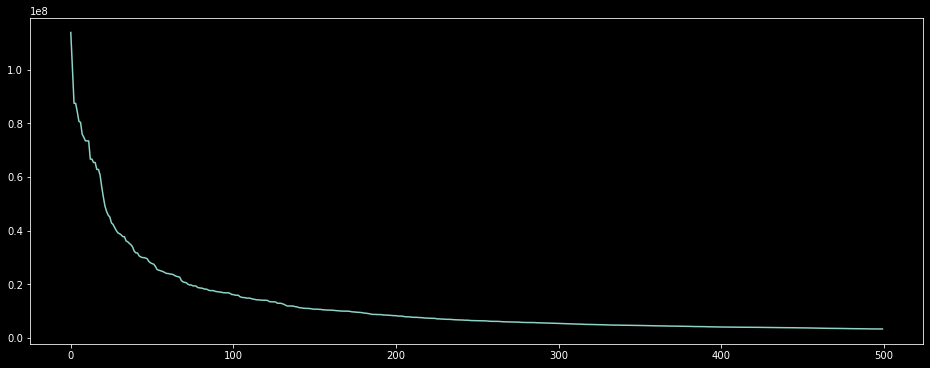

In [71]:
plt.figure(figsize=(16,6))
plt.plot(top500_views.index, top500_views.values);

In [72]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [74]:
df.head()

video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          Ï¢ãÏïÑ by ÎØºÏÑú_Ïú§Ï¢ÖÏã†_Ï¢ãÎãà ÎãµÍ∞Ä        ÎùºÌë∏ÎßàÏΩîÎ¶¨ÏïÑ   
1  hH7wVE8OlQ0      17.14.11            JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ        Edward   
2  9V8bnWUmE9U      17.14.11  ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ïö¥ÎèôÌôî ÏòÅÏÉÅ 2ÌÉÑ (ÎπºÎπºÎ°úÎç∞Ïù¥Î≤ÑÏ†º)     ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ìï´Ïáº   
3  0_8py-t5R80      17.14.11  Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ ÌòÑÏû•, ÎÜìÏπòÎ©¥ ÏïàÎêòÎäî Ïû•Î©¥         ÎØ∏ÎîîÏñ¥Î™ΩÍµ¨   
4  bk55RbxiQdI      17.14.11     ÍπÄÏû•Í≤∏ÏùÄ Î¨ºÎü¨Í∞îÎã§ MBC ÎÖ∏Ï°∞ ÌôòÌò∏ÏôÄ ÎààÎ¨º        NocutV   

   category_id              publish_time  \
0           22  2017-11-13T07:07:36.000Z   
1           25  2017-11-13T10:59:16.000Z   
2           22  2017-11-11T07:16:08.000Z   
3           25  2017-11-12T11:19:52.000Z   
4           25  2017-11-13T11:08:59.000Z   

                                                tags   views  likes  dislikes  \
0                      ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú"  156130   1422        40   
1        JSA|"Í∑ÄÏàú"|"Î∂ÅÌïúÍµ∞"|"Ï¥ùÍ≤©"|"Î∂ÄÏÉÅ"|"JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ"   76533    211        28   
2                ÏïÑÎîîÎã§Ïä§|"ÎπºÎπºÎ°ú"|"Ìï´Ïáº"|"ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨"|"ÎåÄÌïôÎ°ú"|"Í≥µÏó∞"  421409   5112       166   
3  Ïù¥Î™ÖÎ∞ï|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠Í∏àÏßÄ"|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ÌòÑÏû•"|"Ïù¥Î™ÖÎ∞ï Î∞îÎ†àÏù∏"|"Ïù¥Î™ÖÎ∞ï ÎåÄÌÜµÎ†π"|...  222850   2093       173   
4          nocutV|"ÎÖ∏Ïª∑V"|"CBS"|"mbc"|"ÍπÄÏû•Í≤∏"|"Ìï¥ÏûÑ"|"ÌóàÏùºÌõÑ"   84466   1094       109   

   comment_count                                  thumbnail_link  \
0            272  https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg   
1            113  https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg   
2            459  https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg   
3           1219  https://i.ytimg.com/vi/0_8py-t5R80/default.jpg   
4            450  https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....  
1  [Ï±ÑÎÑêAÎã®ÎèÖ]Âåó Î≥ëÏÇ¨ ÌòÑÏû¨ 'ÏùòÏãùÎ∂àÎ™Ö'‚Ä¶ ÌòàÏïï Îñ®Ïñ¥ÏßÄÎäî Ï§ë \n[Ï±ÑÎÑêAÎã®ÎèÖ]Ïö∞Î¶¨Ï∏° ...  
2                                    ÌçºÍ∞ÄÏã§Îïå Íº≠ Ï∂úÏ≤ò Î∂ÄÌÉÅÎìúÎ†§Ïöî  
3                                Îã§Ïä§Îäî ÎàÑÍµ¨Í≤ÅÎãàÍπå Îì£Í≥† ÎÇú ÌõÑ ÌëúÏ†ï  
4  ÍπÄÏû•Í≤∏ MBC ÏÇ¨Ïû•Ïù¥ Í≤∞Íµ≠ Ìï¥ÏûÑÎêêÎã§.\n\nMBC ÎåÄÏ£ºÏ£ºÏù∏ Î∞©ÏÜ°Î¨∏ÌôîÏßÑÌù•ÌöåÎäî 13Ïùº ...

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [76]:
df.describe()

category_id         views         likes      dislikes  comment_count
count  34567.000000  3.456700e+04  3.456700e+04  3.456700e+04   3.456700e+04
mean      21.137675  4.249473e+05  1.218642e+04  5.390980e+02   2.025383e+03
std        6.675455  2.430637e+06  1.170531e+05  1.370852e+04   2.150677e+04
min        1.000000  2.050000e+03  0.000000e+00  0.000000e+00   0.000000e+00
25%       22.000000  4.776850e+04  4.120000e+02  2.100000e+01   1.050000e+02
50%       24.000000  1.114960e+05  1.389000e+03  6.500000e+01   3.450000e+02
75%       25.000000  2.788665e+05  3.704500e+03  1.750000e+02   9.290000e+02
max       44.000000  1.138762e+08  5.150839e+06  1.470388e+06   1.142274e+06

#### Heatmap

<AxesSubplot:>

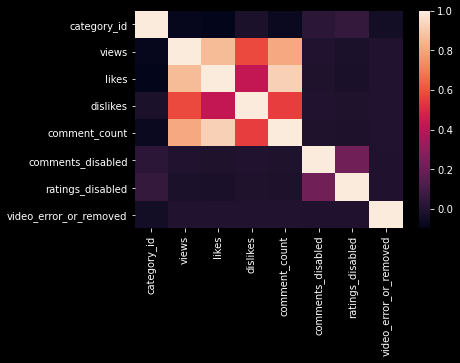

In [82]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot:>

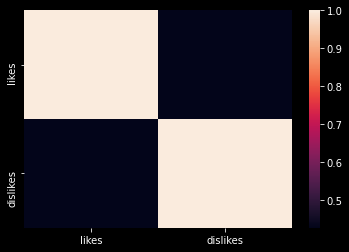

In [83]:
sns.heatmap(df[['likes','dislikes']].corr())

<AxesSubplot:>

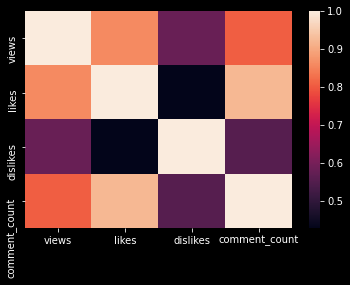

In [84]:
sns.heatmap(df[['views','likes','dislikes','comment_count']].corr())

<AxesSubplot:>

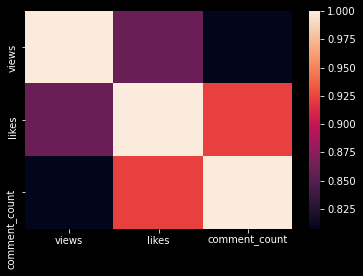

In [85]:
sns.heatmap(df[['views','likes','comment_count']].corr())

<AxesSubplot:>

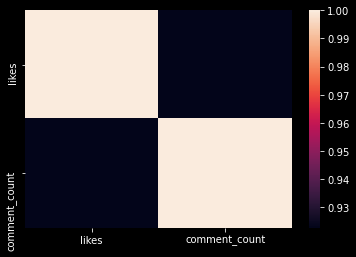

In [86]:
sns.heatmap(df[['likes','comment_count']].corr())

<AxesSubplot:>

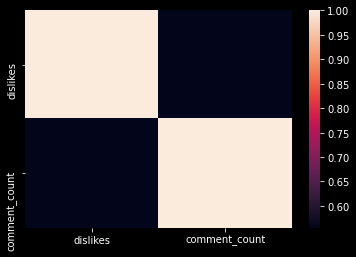

In [87]:
sns.heatmap(df[['dislikes','comment_count']].corr())

#### Check the Ratio of "Boolean" values

In [93]:
(df.comments_disabled == True).sum() / len(df.comments_disabled)

0.01478288541094107

In [95]:
(df.ratings_disabled == True).sum() / len(df.ratings_disabled)

0.0405010559203865

In [96]:
(df.video_error_or_removed == True).sum() / len(df.video_error_or_removed)

0.001186102351954176

#### Time Series

In [102]:
df.trending_date

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
34562    18.14.06
34563    18.14.06
34564    18.14.06
34565    18.14.06
34566    18.14.06
Name: trending_date, Length: 34567, dtype: object

In [101]:
(df.trending_date.str.contains('.') == False).sum()

0

In [114]:
df.trending_date.unique()

array(['17.14.11', '17.15.11', '17.16.11', '17.17.11', '17.18.11',
       '17.19.11', '17.20.11', '17.21.11', '17.22.11', '17.23.11',
       '17.24.11', '17.25.11', '17.26.11', '17.27.11', '17.28.11',
       '17.29.11', '17.30.11', '17.01.12', '17.02.12', '17.03.12',
       '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12',
       '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12',
       '17.14.12', '17.15.12', '17.16.12', '17.17.12', '17.18.12',
       '17.19.12', '17.20.12', '17.21.12', '17.22.12', '17.23.12',
       '17.24.12', '17.25.12', '17.26.12', '17.27.12', '17.28.12',
       '17.29.12', '17.30.12', '17.31.12', '18.01.01', '18.02.01',
       '18.03.01', '18.04.01', '18.05.01', '18.06.01', '18.07.01',
       '18.08.01', '18.09.01', '18.12.01', '18.13.01', '18.14.01',
       '18.15.01', '18.16.01', '18.17.01', '18.18.01', '18.19.01',
       '18.20.01', '18.21.01', '18.22.01', '18.23.01', '18.24.01',
       '18.25.01', '18.26.01', '18.27.01', '18.28.01', '18.29.

In [106]:
df.trending_date[-10:]

34557    18.14.06
34558    18.14.06
34559    18.14.06
34560    18.14.06
34561    18.14.06
34562    18.14.06
34563    18.14.06
34564    18.14.06
34565    18.14.06
34566    18.14.06
Name: trending_date, dtype: object

In [103]:
import datetime

In [120]:
'20' + df.trending_date

0        2017.14.11
1        2017.14.11
2        2017.14.11
3        2017.14.11
4        2017.14.11
            ...    
34562    2018.14.06
34563    2018.14.06
34564    2018.14.06
34565    2018.14.06
34566    2018.14.06
Name: trending_date, Length: 34567, dtype: object

In [121]:
df.trending_date = '20' + df.trending_date

In [124]:
datetime.datetime.strptime(df.trending_date[0], '%Y.%d.%m')

datetime.datetime(2017, 11, 14, 0, 0)

In [127]:
datetime.datetime.strptime(df.trending_date[0], '%Y.%d.%m').date()

datetime.date(2017, 11, 14)

In [131]:
[datetime.datetime.strptime(x, '%Y.%d.%m').date() for x in df.trending_date][:10]

[datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14)]

In [132]:
df.trending_date = [datetime.datetime.strptime(x, '%Y.%d.%m').date() for x in df.trending_date]

In [135]:
df.set_index('trending_date', inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34567 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   title                   34567 non-null  object
 2   channel_title           34567 non-null  object
 3   category_id             34567 non-null  int64 
 4   publish_time            34567 non-null  object
 5   tags                    34567 non-null  object
 6   views                   34567 non-null  int64 
 7   likes                   34567 non-null  int64 
 8   dislikes                34567 non-null  int64 
 9   comment_count           34567 non-null  int64 
 10  thumbnail_link          34567 non-null  object
 11  comments_disabled       34567 non-null  bool  
 12  ratings_disabled        34567 non-null  bool  
 13  video_error_or_removed  34567 non-null  bool  
 14  description             31404 non-null  objec

In [143]:
df.index

Index([2017-11-14, 2017-11-14, 2017-11-14, 2017-11-14, 2017-11-14, 2017-11-14,
       2017-11-14, 2017-11-14, 2017-11-14, 2017-11-14,
       ...
       2018-06-14, 2018-06-14, 2018-06-14, 2018-06-14, 2018-06-14, 2018-06-14,
       2018-06-14, 2018-06-14, 2018-06-14, 2018-06-14],
      dtype='object', name='trending_date', length=34567)

In [147]:
pd.to_datetime(df.index)

DatetimeIndex(['2017-11-14', '2017-11-14', '2017-11-14', '2017-11-14',
               '2017-11-14', '2017-11-14', '2017-11-14', '2017-11-14',
               '2017-11-14', '2017-11-14',
               ...
               '2018-06-14', '2018-06-14', '2018-06-14', '2018-06-14',
               '2018-06-14', '2018-06-14', '2018-06-14', '2018-06-14',
               '2018-06-14', '2018-06-14'],
              dtype='datetime64[ns]', name='trending_date', length=34567, freq=None)

In [146]:
df.index = pd.to_datetime(df.index)

In [148]:
df.index

DatetimeIndex(['2017-11-14', '2017-11-14', '2017-11-14', '2017-11-14',
               '2017-11-14', '2017-11-14', '2017-11-14', '2017-11-14',
               '2017-11-14', '2017-11-14',
               ...
               '2018-06-14', '2018-06-14', '2018-06-14', '2018-06-14',
               '2018-06-14', '2018-06-14', '2018-06-14', '2018-06-14',
               '2018-06-14', '2018-06-14'],
              dtype='datetime64[ns]', name='trending_date', length=34567, freq=None)

In [156]:
df.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='trending_date', length=34567)

In [157]:
df.index.month

Int64Index([11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
            ...
             6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
           dtype='int64', name='trending_date', length=34567)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34567 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   title                   34567 non-null  object
 2   channel_title           34567 non-null  object
 3   category_id             34567 non-null  int64 
 4   publish_time            34567 non-null  object
 5   tags                    34567 non-null  object
 6   views                   34567 non-null  int64 
 7   likes                   34567 non-null  int64 
 8   dislikes                34567 non-null  int64 
 9   comment_count           34567 non-null  int64 
 10  thumbnail_link          34567 non-null  object
 11  comments_disabled       34567 non-null  bool  
 12  ratings_disabled        34567 non-null  bool  
 13  video_error_or_removed  34567 non-null  bool  
 14  description             31404 non-nul

### null value

In [177]:
df[df.description.isnull()==True].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3163 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                3163 non-null   object
 1   title                   3163 non-null   object
 2   channel_title           3163 non-null   object
 3   category_id             3163 non-null   int64 
 4   publish_time            3163 non-null   object
 5   tags                    3163 non-null   object
 6   views                   3163 non-null   int64 
 7   likes                   3163 non-null   int64 
 8   dislikes                3163 non-null   int64 
 9   comment_count           3163 non-null   int64 
 10  thumbnail_link          3163 non-null   object
 11  comments_disabled       3163 non-null   bool  
 12  ratings_disabled        3163 non-null   bool  
 13  video_error_or_removed  3163 non-null   bool  
 14  description             0 non-null    

In [178]:
df[df.description.isnull()==True]

video_id                                              title  \
trending_date                                                                   
2017-11-14     Ssx4JpUsW_U   [ Ï†ÑÏ≤¥ ] ÍπÄÏñ¥Ï§ÄÏùò Îâ¥Ïä§Í≥µÏû• 1113(Ïõî) Î∞ïÎ≤îÍ≥Ñ, ÏµúÍ∞ïÏö±, ÍπÄÏ§ÄÌòï, Ï†ïÏ≤≠Îûò, ÏûÑÏÉÅÌõà   
2017-11-14     K45GLGZXY4k          'Î∞ïÏ†ïÌù¨ÏóêÍ≤å Í∏∏ÏùÑ Î¨ªÎã§' ÏÑ∏ÎØ∏ÎÇòÏóê Îã§ÎÖÄÏôÄÏÑú (Ï†ïÍ∑úÏû¨ ÏπºÎüº, 11Ïõî 13Ïùº)   
2017-11-14     d5bsz2nJvrM                          È°ΩÂº∫ÁöÑÂ∞èÁîüÂëΩ! Â©¥ÂÑøÈù†Ëá™Â∑±ÂäõÊ∞î‰ªéÂ¶àÂ¶àËÇöÂ≠êÈáåÊå£ËÑ±Âá∫‰∏ñ   
2017-11-14     O5V8CUj-fmg                                [1Ïùº 2Í∞ïÎã§ÎãàÏóò] ÏïÑÎ¶ÑÎã§Ïö¥ ÎÖ§ ü¶ã   
2017-11-14     P9KQOvLRVNQ  Î∞ïÏßÄÏõêÏùò Ïù¥Î™ÖÎ∞ï Í∏∞ÏûêÌöåÍ≤¨ Í∑πÎîú!! ÏïàÏ¥àÎî©, Î∞îÎ•∏Ï†ïÎãπ ÏûêÍæ∏ Í∏∞ÏõÉÍ±∞Î¶¨Î©¥ ÎÇò ÎØºÏ£ºÎãπ Í∞ÑÎã§...   
...                    ...                                                ...   
2018-06-14     cFoqbHGCS0U  *[ÌôÄÎÇ®Îß§]„Öã„Öã„Öã„Öã„Öã„Öã„Öã„ÖãÏÇºÍ≤πÏÇ¥ ÍπÄÎ∞• Ìï¥Î®πÍ∏∞!!„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã(Í∑∏ÎÉ• ÏÜåÏßàÏù¥ ...   
2018-06-14     yrrlu8ASIXk            ÍπÄÍ≤ΩÏàò, Ï∂úÍµ¨Ï°∞ÏÇ¨ Î∞úÌëú Î∞òÏùë. ÏïàÎèÑÏùò ÌïúÏà®Í≥º Î∞©Í∏ãÎØ∏ÏÜå, ÏÜåÏã¨Ìïú Ïï†Ï†ïÌëúÌòÑ   
2018-06-14     8LkwqZiT_04  Î∞©ÌÉÑÏÜåÎÖÑÎã® ÏßÑÏßú Î¶¨ÏñºÌïú Ïà†Î®πÎ∞© ÌòïÎì§Ïù¥ ÌèâÍ∞ÄÌïú Ï†ïÍµ≠Ïù¥Ïùò Ìå®ÏÖòÏ†êÏàò (Ï†ïÍµ≠Ïù¥Ïùò ÏïåÎùºÎîò Î∞î...   
2018-06-14     soRJt4EdFjo                 Îß§Ïã§Ïû•ÏïÑÏ∞å Îã¥Í∑∏ÎäîÎ≤ï  [ÎãπÏùÄ Ï§ÑÏù¥Í≥† ÎçîÏö± ÏïÑÏÇ≠Ìïú ÏãùÍ∞êÏùò ÎπÑÍ≤∞]   
2018-06-14     hWpPf2jKhh0                     Í∞ÄÎ∞© ÏÇ∞Îã§Í≥† Ïπ¥ÎìúÎ°†500ÎßåÏõê ÎåÄÏ∂úÌïú ÏïÑÎÇ¥ ÏÇ¨Ïù¥Îã§ Ï∞∏ÍµêÏú°   

              channel_title  category_id              publish_time  \
trending_date                                                        
2017-11-14             ÏãúÎåÄÏ†ïÏã†           25  2017-11-13T00:02:11.000Z   
2017-11-14            Ï†ïÍ∑úÏû¨TV           25  2017-11-13T09:04:03.000Z   
2017-11-14             ÈæôÁöÑ‰º†‰∫∫           22  2017-11-12T01:31:39.000Z   
2017-11-14         ÌôÄÎ¶¨Îç∞Ïù¥ÎÖ§ Ju           22  2017-11-13T11:37:45.000Z   
2017-11-14            Îâ¥Ïä§ ÎãπÏû•           25  2017-11-13T01:22:04.000Z   
...                     ...          ...                       ...   
2018-06-14              ÌôÄÎÇ®Îß§           22  2018-06-13T11:36:59.000Z   
2018-06-14         MediaVOP           25  2018-06-13T11:29:50.000Z   
2018-06-14           ÌÉúÌÉú'sÎ≠îÎì§           24  2018-06-12T15:02:21.000Z   
2018-06-14        Come Back           26  2018-06-11T04:46:25.000Z   
2018-06-14              ÌïòÎÇòÎçï           24  2018-06-12T07:00:08.000Z   

                                                            tags  views  \
trending_date                                                             
2017-11-14               Î∞ïÎ≤îÍ≥Ñ|"ÏµúÍ∞ïÏö±"|"ÍπÄÏ§ÄÌòï"|"Ï†ïÏ≤≠Îûò"|"ÏûÑÏÉÅÌõà"|"ÍπÄÏñ¥Ï§ÄÏùò Îâ¥Ïä§Í≥µÏû•"  88115   
2017-11-14     Ï†ïÍ∑úÏû¨Ìã∞ÎπÑ|"Ï†ïÍ∑úÏû¨TV"|"jkj"|"Ï†ïÍ∑úÏû¨Îâ¥Ïä§"|"ÏãúÏÇ¨"|"Í≤ΩÏ†ú"|"Íµ≠Ï†ú"|"Ï†ïÍ∑ú...  58676   
2017-11-14                                                [none]   8266   
2017-11-14                                                [none]  13662   
2017-11-14            Î∞ïÏßÄÏõê|"Ïù¥Î™ÖÎ∞ï"|"Í∏∞ÏûêÌöåÍ≤¨"|"ÏïàÏ¥àÎî©"|"Î∞îÎ•∏Ï†ïÎãπ"|"ÎØºÏ£ºÎãπ"|"ÍøÄÎ†ÅÍøÄÎ†Å"  59759   
...                                                          ...    ...   
2018-06-14                                                [none]  74150   
2018-06-14     ÏßÄÎ∞©ÏÑ†Í±∞|"ÍπÄÍ≤ΩÏàò"|"Í≤ΩÎÇ®"|"Í≤ΩÎÇ®ÎèÑÏßÄÏÇ¨"|"ÎØºÏ£ºÎãπ"|"ÎçîÎØºÏ£º"|"ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ"|"...  71730   
2018-06-14                                                [none]  91844   
2018-06-14                                         Îß§Ïã§|"Ïû•ÏïÑÏ∞å"|"ÏÑ§ÌÉï"  38180   
2018-06-14                                                [none]  27327   

               likes  dislikes  comment_count  \
trending_date                                   
2017-11-14       765        63            104   
2017-11-14      2183       390            854   
2017-11-14         0         0              0   
2017-11-14       610         3             55  

### line plot

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df.head(2)

video_id               title channel_title  category_id  \
trending_date                                                               
2017-11-14     RxGQe4EeEpA  Ï¢ãÏïÑ by ÎØºÏÑú_Ïú§Ï¢ÖÏã†_Ï¢ãÎãà ÎãµÍ∞Ä        ÎùºÌë∏ÎßàÏΩîÎ¶¨ÏïÑ           22   
2017-11-14     hH7wVE8OlQ0    JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ        Edward           25   

                           publish_time  \
trending_date                             
2017-11-14     2017-11-13T07:07:36.000Z   
2017-11-14     2017-11-13T10:59:16.000Z   

                                                      tags   views  likes  \
trending_date                                                               
2017-11-14                   ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú"  156130   1422   
2017-11-14     JSA|"Í∑ÄÏàú"|"Î∂ÅÌïúÍµ∞"|"Ï¥ùÍ≤©"|"Î∂ÄÏÉÅ"|"JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ"   76533    211   

               dislikes  comment_count  \
trending_date                            
2017-11-14           40            272   
2017-11-14           28            113   

                                               thumbnail_link  \
trending_date                                                   
2017-11-14     https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg   
2017-11-14     https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg   

               comments_disabled  ratings_disabled  video_error_or_removed  \
trending_date                                                                
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   

                                                     description  
trending_date                                                     
2017-11-14     Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....  
2017-11-14     [Ï±ÑÎÑêAÎã®ÎèÖ]Âåó Î≥ëÏÇ¨ ÌòÑÏû¨ 'ÏùòÏãùÎ∂àÎ™Ö'‚Ä¶ ÌòàÏïï Îñ®Ïñ¥ÏßÄÎäî Ï§ë \n[Ï±ÑÎÑêAÎã®ÎèÖ]Ïö∞Î¶¨Ï∏° ...

In [184]:
len(df.channel_title.unique())

4043

In [195]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_time',
       'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34567 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   title                   34567 non-null  object
 2   channel_title           34567 non-null  object
 3   category_id             34567 non-null  int64 
 4   publish_time            34567 non-null  object
 5   tags                    34567 non-null  object
 6   views                   34567 non-null  int64 
 7   likes                   34567 non-null  int64 
 8   dislikes                34567 non-null  int64 
 9   comment_count           34567 non-null  int64 
 10  thumbnail_link          34567 non-null  object
 11  comments_disabled       34567 non-null  bool  
 12  ratings_disabled        34567 non-null  bool  
 13  video_error_or_removed  34567 non-null  bool  
 14  description             31404 non-nul

In [203]:
df['video_id'].dtype

dtype('O')

In [204]:
df['video_id'].dtype == 'O'

True

In [205]:
df['category_id'].dtype

dtype('int64')

In [209]:
df['category_id'].dtype == 'int'

True

In [211]:
df['comments_disabled'].dtype

dtype('bool')

In [212]:
df['comments_disabled'].dtype == 'bool'

True

In [214]:
cat_col = []
num_col = []
bool_col = []
for col in df.columns:
    if df[col].dtype == 'O':
        print(col,' ==> object')
        cat_col.append(col)
    elif df[col].dtype == 'int':
        print(col,' ==> int')
        num_col.append(col)
    elif df[col].dtype == 'bool':
        print(col,' ==> bool')
        bool_col.append(col)

video_id  ==> object
title  ==> object
channel_title  ==> object
category_id  ==> int
publish_time  ==> object
tags  ==> object
views  ==> int
likes  ==> int
dislikes  ==> int
comment_count  ==> int
thumbnail_link  ==> object
comments_disabled  ==> bool
ratings_disabled  ==> bool
video_error_or_removed  ==> bool
description  ==> object


In [215]:
num_col

['category_id', 'views', 'likes', 'dislikes', 'comment_count']

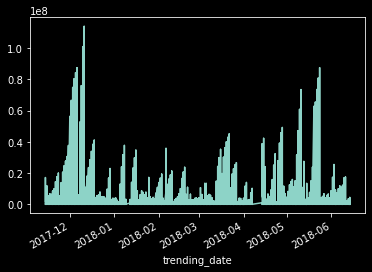

In [240]:
df['views'].plot();

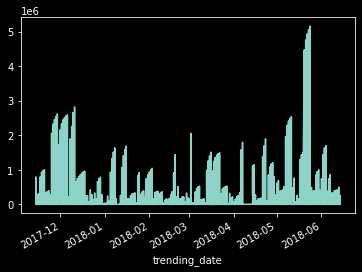

In [218]:
df['likes'].plot();

<AxesSubplot:xlabel='trending_date'>

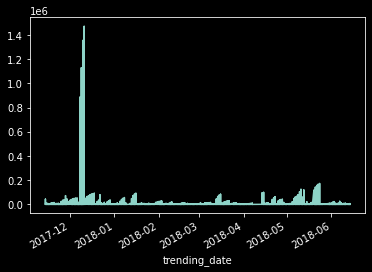

In [219]:
df['dislikes'].plot()

<AxesSubplot:xlabel='trending_date'>

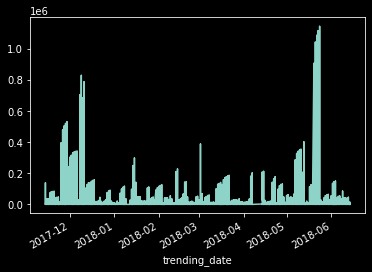

In [221]:
df['comment_count'].plot()

In [222]:
df['category_id'].unique()

array([22, 25, 17, 19, 23, 10, 24, 15,  1, 43, 28, 20, 29,  2, 27, 26, 44])

In [231]:
# Entertainment
df[df['category_id'] == 22].head()

video_id                                        title  \
trending_date                                                             
2017-11-14     RxGQe4EeEpA                           Ï¢ãÏïÑ by ÎØºÏÑú_Ïú§Ï¢ÖÏã†_Ï¢ãÎãà ÎãµÍ∞Ä   
2017-11-14     9V8bnWUmE9U                   ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ïö¥ÎèôÌôî ÏòÅÏÉÅ 2ÌÉÑ (ÎπºÎπºÎ°úÎç∞Ïù¥Î≤ÑÏ†º)   
2017-11-14     4Nxb_nQDYWo                             ÏòàÎä•Ïã† Ïù¥Í¥ëÏàò ÌïòÏù¥ÎùºÏù¥Ìä∏ Î™®Ïùå   
2017-11-14     cplEUy1zk80  [ÏùºÎ≥∏Î∞òÏùë] ÌïúÍµ≠Ïù¥ Ïù∏ÎèÑ-ÌÉúÌèâÏñë ÏïàÎ≥¥ÎùºÏù∏Ïóê Ï∞∏Í∞ÄÎ•º Í±∞Ï†à !!! ÎÇúÎ¶¨Í∞Ä ÎÇú ÏùºÎ≥∏   
2017-11-14     iToRdbxuMtg                              ÌòÑÏû¨ ÎÖºÎûÄÏ§ëÏù∏ ÌôçÎåÄ Î®∏Î¶¨Ï±ÑÎÇ®   

                channel_title  category_id              publish_time  \
trending_date                                                          
2017-11-14             ÎùºÌë∏ÎßàÏΩîÎ¶¨ÏïÑ           22  2017-11-13T07:07:36.000Z   
2017-11-14          ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨ Ìï´Ïáº           22  2017-11-11T07:16:08.000Z   
2017-11-14       Ï±ÑÎ¶∞Ïù¥Ïùò Ï¶êÍ±∞Ïö¥ Ïú†ÌäúÎ∏å           22  2017-11-12T03:30:47.000Z   
2017-11-14     Î≥¥Í≥† Ïã∂ÏóàÎçò Ìï¥Ïô∏Î∞òÏùë Ïù¥Ïäà           22  2017-11-12T11:40:23.000Z   
2017-11-14               Í∂ÅÍ∏àÌÉÄÌåå           22  2017-11-12T18:52:16.000Z   

                                                            tags   views  \
trending_date                                                              
2017-11-14                         ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú"  156130   
2017-11-14                   ÏïÑÎîîÎã§Ïä§|"ÎπºÎπºÎ°ú"|"Ìï´Ïáº"|"ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨"|"ÎåÄÌïôÎ°ú"|"Í≥µÏó∞"  421409   
2017-11-14     Positive|"Energy"|"Chakra"|"Balancing"|"Healin...  114858   
2017-11-14     ÏùºÎ≥∏|"ÌïúÍµ≠"|"ÏïàÎ≥¥ÎùºÏù∏"|"Ïù∏ÎèÑ ÌÉúÌèâÏñë"|"Ïù∏ÎèÑ"|"ÌÉúÌèâÏñë"|"ÎØ∏Íµ≠"|"Ï§ëÍµ≠"|"ÎèôÎßπ"   70166   
2017-11-14                                           ÌôçÎåÄ|"ÌôçÎåÄ Î≤ÑÏä§ÌÇπ"   65547   

               likes  dislikes  comment_count  \
trending_date                                   
2017-11-14      1422        40            272   
2017-11-14      5112       166            459   
2017-11-14       252        40             36   
2017-11-14       301        37            352   
2017-11-14        91       207            154   

                                               thumbnail_link  \
trending_date                                                   
2017-11-14     https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg   
2017-11-14     https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg   
2017-11-14     https://i.ytimg.com/vi/4Nxb_nQDYWo/default.jpg   
2017-11-14     https://i.ytimg.com/vi/cplEUy1zk80/default.jpg   
2017-11-14     https://i.ytimg.com/vi/iToRdbxuMtg/default.jpg   

               comments_disabled  ratings_disabled  video_error_or_removed  \
trending_date                                                                
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   

                                                     description  
trending_date                                                     
2017-11-14     Ïú§Ï¢ÖÏã† 'Ï¢ãÎãà'Ïùò ÎãµÍ∞Ä 'Ï¢ãÏïÑ' ÏµúÏ¥à Í≥µÍ∞ú!\nÍ∑∏ Ïó¨ÏûêÏùò Ïù¥ÏïºÍ∏∞Î•º ÏßÄÍ∏à ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî....  
2017-11-14                                       ÌçºÍ∞ÄÏã§Îïå Íº≠ Ï∂úÏ≤ò Î∂ÄÌÉÅÎìúÎ†§Ïöî  
2017-11-14       Îß§Ïùº 2Í∞ú ÏòÅÏÉÅ ÏóÖÎ°úÎìú Îê©ÎãàÎã§ ^^\nÏ¶êÍ≤ÅÍ≤å Î≥¥ÏÖ®Îã§Î©¥ Íµ¨ÎèÖÍ≥º Ï¢ãÏïÑÏöîÎ•º ÎàåÎü¨Ï£ºÏÑ∏Ïöî ^^  
2017-11-14     Kevin MacLeodÏùò At LaunchÏùÄ(Îäî) Creative Commons ...  
2017-11-14                      ÌôçÎåÄ ÎåÑÏä§ Î≤ÑÏä§ÌÇπÌïòÎäîÎç∞ Í∞ëÏûêÍ∏∞ Ïó¨ÏÑ±Î∂Ñ Î®∏Î¶¨ Ïû°Í≥† ÎÇòÏò¥...

In [230]:
# Politics
df[df['category_id'] == 25].head()

video_id                                             title  \
trending_date                                                                  
2017-11-14     hH7wVE8OlQ0                                  JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ   
2017-11-14     0_8py-t5R80                        Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ ÌòÑÏû•, ÎÜìÏπòÎ©¥ ÏïàÎêòÎäî Ïû•Î©¥   
2017-11-14     bk55RbxiQdI                           ÍπÄÏû•Í≤∏ÏùÄ Î¨ºÎü¨Í∞îÎã§ MBC ÎÖ∏Ï°∞ ÌôòÌò∏ÏôÄ ÎààÎ¨º   
2017-11-14     AmP0ryzDmbY  ÍπÄÏ†ïÏàô Ïó¨ÏÇ¨Îäî Ïôú Í∞ëÏûêÍ∏∞ Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†π Ï£ºÎ®∏ÎãàÏóê ÏÜêÏùÑ ÎÑ£ÏóàÎÇò? Ïù∏ÎèÑÎÑ§ÏãúÏïÑ ÎåÄÌÜµÎ†πÎèÑ ÍπúÎÜÄ   
2017-11-14     Ssx4JpUsW_U  [ Ï†ÑÏ≤¥ ] ÍπÄÏñ¥Ï§ÄÏùò Îâ¥Ïä§Í≥µÏû• 1113(Ïõî) Î∞ïÎ≤îÍ≥Ñ, ÏµúÍ∞ïÏö±, ÍπÄÏ§ÄÌòï, Ï†ïÏ≤≠Îûò, ÏûÑÏÉÅÌõà   

              channel_title  category_id              publish_time  \
trending_date                                                        
2017-11-14           Edward           25  2017-11-13T10:59:16.000Z   
2017-11-14            ÎØ∏ÎîîÏñ¥Î™ΩÍµ¨           25  2017-11-12T11:19:52.000Z   
2017-11-14           NocutV           25  2017-11-13T11:08:59.000Z   
2017-11-14              ÌïòÏö∞Ïä§           25  2017-11-12T10:17:48.000Z   
2017-11-14             ÏãúÎåÄÏ†ïÏã†           25  2017-11-13T00:02:11.000Z   

                                                            tags   views  \
trending_date                                                              
2017-11-14           JSA|"Í∑ÄÏàú"|"Î∂ÅÌïúÍµ∞"|"Ï¥ùÍ≤©"|"Î∂ÄÏÉÅ"|"JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ"   76533   
2017-11-14     Ïù¥Î™ÖÎ∞ï|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠Í∏àÏßÄ"|"Ïù¥Î™ÖÎ∞ï Ï∂úÍµ≠ÌòÑÏû•"|"Ïù¥Î™ÖÎ∞ï Î∞îÎ†àÏù∏"|"Ïù¥Î™ÖÎ∞ï ÎåÄÌÜµÎ†π"|...  222850   
2017-11-14             nocutV|"ÎÖ∏Ïª∑V"|"CBS"|"mbc"|"ÍπÄÏû•Í≤∏"|"Ìï¥ÏûÑ"|"ÌóàÏùºÌõÑ"   84466   
2017-11-14     ÍπÄÏ†ïÏàô|"ÍπÄÏ†ïÏàô Ïó¨ÏÇ¨"|"ÍπÄÏ†ïÏàô Î¨∏Ïû¨Ïù∏"|"Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†π"|"Î¨∏Ïû¨Ïù∏"|"Î¨∏Ïû¨Ïù∏ Ïù∏ÎèÑ...  188707   
2017-11-14               Î∞ïÎ≤îÍ≥Ñ|"ÏµúÍ∞ïÏö±"|"ÍπÄÏ§ÄÌòï"|"Ï†ïÏ≤≠Îûò"|"ÏûÑÏÉÅÌõà"|"ÍπÄÏñ¥Ï§ÄÏùò Îâ¥Ïä§Í≥µÏû•"   88115   

               likes  dislikes  comment_count  \
trending_date                                   
2017-11-14       211        28            113   
2017-11-14      2093       173           1219   
2017-11-14      1094       109            450   
2017-11-14       545       311            357   
2017-11-14       765        63            104   

                                               thumbnail_link  \
trending_date                                                   
2017-11-14     https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg   
2017-11-14     https://i.ytimg.com/vi/0_8py-t5R80/default.jpg   
2017-11-14     https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg   
2017-11-14     https://i.ytimg.com/vi/AmP0ryzDmbY/default.jpg   
2017-11-14     https://i.ytimg.com/vi/Ssx4JpUsW_U/default.jpg   

               comments_disabled  ratings_disabled  video_error_or_removed  \
trending_date                                                                
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   

                                                     description  
trending_date                                                     
2017-11-14     [Ï±ÑÎÑêAÎã®ÎèÖ]Âåó Î≥ëÏÇ¨ ÌòÑÏû¨ 'ÏùòÏãùÎ∂àÎ™Ö'‚Ä¶ ÌòàÏïï Îñ®Ïñ¥ÏßÄÎäî Ï§ë \n[Ï±ÑÎÑêAÎã®ÎèÖ]Ïö∞Î¶¨Ï∏° ...  
2017-11-14                                   Îã§Ïä§Îäî ÎàÑÍµ¨Í≤ÅÎãàÍπå Îì£Í≥† ÎÇú ÌõÑ ÌëúÏ†ï  
2017-11-14     ÍπÄÏû•Í≤∏ MBC ÏÇ¨Ïû•Ïù¥ Í≤∞Íµ≠ Ìï¥ÏûÑÎêêÎã§.\n\nMBC ÎåÄÏ£ºÏ£ºÏù∏ Î∞©ÏÜ°Î¨∏ÌôîÏßÑÌù•ÌöåÎäî 13Ïùº ...  
2017-11-14     ÍπÄÏ†ïÏàô Ïó¨ÏÇ¨Îäî Ïôú Í∞ëÏûêÍ∏∞ Î¨∏Ïû¨Ïù∏ ÎåÄÌÜµÎ†π Ï£ºÎ®∏ÎãàÏóê ÏÜêÏùÑ ÎÑ£ÏóàÎÇò? Ïù∏ÎèÑÎÑ§ÏãúÏïÑ ÎåÄÌÜµÎ†πÎèÑ ...  
2017-11-14                                   

In [229]:
# Sports
df[df['category_id'] == 17].head()

video_id                                              title  \
trending_date                                                                   
2017-11-14     9dQ02l7YlQI  Ïö∞Î¶¨Í∞Ä ÏõêÌñàÎçò Í≤ΩÍ∏∞Î†• !!! ÏÜêÌù•ÎØº Î©ÄÌã∞Í≥®, Í∏∞ÏÑ±Ïö© ÌÉàÏïïÎ∞ï ‚óè ÎåÄÌïúÎØºÍµ≠ vs ÏΩúÎ°¨ÎπÑ...   
2017-11-14     9r5ncSsv59I      ÏÜêÌù•ÎØº, Ï∞®Î≤îÍ∑ºÏù¥ Î∂ÄÎ•¥Ïûê ÎßêÏóÜÏù¥ ÏïàÍ≤®ÏÑú Ïö∏Îã§!!! Ï∞®Î∂êÎèÑ Îç©Îã¨Ïñ¥ ÏΩîÎÅùÏù¥ Îπ®Í∞úÏßëÎãàÎã§   
2017-11-14     FT0jBSkCqjQ                        [Í≤Å ÏóÜÎäî ÎÖÄÏÑùÎì§] ÌïúÎ∞òÎèÑ ÏµúÍ≥† ÌóàÏÑ∏ÎÇ®Ïùò ÏµúÌõÑÎäî?   
2017-11-14     fz7whSExAk4                      Ïö©ÌÅêÎÜÄÏù¥ Ìï¥Î≥¥ÏïòÎã§! Ïù¥Ïö©Í∑úÎ≥¥Îã§ ÌååÏö∏ ÎßéÏù¥ÏπòÍ∏∞ ÎèÑÏ†Ñ!!   
2017-11-14     iDdElhzVx_c         171110 ÎßàÎ•¥ÏÖÄÎ°ú ÎØ∏Ïπú Ï§ëÍ±∞Î¶¨ Í≥®!!! ‚óèÏùºÎ≥∏ 1:3 Î∏åÎùºÏßà ÌïòÏù¥ÎùºÏù¥Ìä∏!   

                            channel_title  category_id  \
trending_date                                            
2017-11-14                     HEON honey           17   
2017-11-14              Sports Highlights           17   
2017-11-14     ROAD FIGHTING CHAMPIONSHIP           17   
2017-11-14                       Ïç©ÏΩîÏπòÏùò ÏïºÍµ¨Ïëà           17   
2017-11-14                           Îß®Ïú†ÌäúÎ∏å           17   

                           publish_time  \
trending_date                             
2017-11-14     2017-11-10T13:22:26.000Z   
2017-11-14     2017-11-11T01:34:22.000Z   
2017-11-14     2017-11-11T16:39:52.000Z   
2017-11-14     2017-11-13T10:00:02.000Z   
2017-11-14     2017-11-10T15:08:47.000Z   

                                                            tags    views  \
trending_date                                                               
2017-11-14                                                [none]  1812042   
2017-11-14     Ï∞®Î≤îÍ∑º|"ÎåÄÌïúÎØºÍµ≠ ÏΩúÎ°¨ÎπÑÏïÑ"|"ÌïúÍµ≠ ÏΩúÎ°¨ÎπÑÏïÑ"|"Ï∂ïÍµ¨"|"ÌèâÍ∞ÄÏ†Ñ"|"Íµ≠Í∞ÄÎåÄÌëú"|"ÏÜê...   290742   
2017-11-14                                                [none]   204935   
2017-11-14     Ïç©ÏΩîÏπò|"Ïç©ÏΩîÏπòÏùòÏïºÍµ¨Ïëà"|"ÏïºÍµ¨Ïëà"|"ÏïºÍµ¨"|"ÏïºÍµ¨ÏΩîÏπò"|"ÌîÑÎ°úÏïºÍµ¨"|"ÎèôÎÑ§ÏïºÍµ¨"|...    30406   
2017-11-14     Îß®Ïú†|"Îß®Ïú†ÌäúÎ∏å"|"Îß®Ï≤¥Ïä§ÌÑ∞Ïú†ÎÇòÏù¥Ìã∞Îìú"|"Îß®Ï≤¥Ïä§ÌÑ∞ Ïú†ÎÇòÏù¥Ìã∞Îìú"|"Î¨¥Î¶¨Îâ¥"|"Î¨¥Î¶¨Îâ¥ ...   467546   

               likes  dislikes  comment_count  \
trending_date                                   
2017-11-14      5142       511           5296   
2017-11-14       959        36            262   
2017-11-14       197        87            243   
2017-11-14       368        12            599   
2017-11-14       542        83            899   

                                               thumbnail_link  \
trending_date                                                   
2017-11-14     https://i.ytimg.com/vi/9dQ02l7YlQI/default.jpg   
2017-11-14     https://i.ytimg.com/vi/9r5ncSsv59I/default.jpg   
2017-11-14     https://i.ytimg.com/vi/FT0jBSkCqjQ/default.jpg   
2017-11-14     https://i.ytimg.com/vi/fz7whSExAk4/default.jpg   
2017-11-14     https://i.ytimg.com/vi/iDdElhzVx_c/default.jpg   

               comments_disabled  ratings_disabled  video_error_or_removed  \
trending_date                                                                
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   
2017-11-14                 False             False                   False   

                                                     description  
trending_date                                                     
2017-11-14             2017. 11. 10\nÍµ≠Í∞ÄÎåÄÌëú ÏπúÏÑ†Í≤ΩÍ∏∞\nÎåÄÌïúÎØºÍµ≠ 2 vs 1 ÏΩúÎ°¨ÎπÑÏïÑ  
2017-11-14                                                    ÏÑ§Î™Ö  
2017-11-14                           [Í≤Å ÏóÜÎäî ÎÖÄÏÑùÎì§] ÌïúÎ∞òÎèÑ ÏµúÍ≥† ÌóàÏÑ∏ÎÇ®Ïùò ÏµúÌõÑÎäî?  
2017-11-14     

In [234]:
df.sort_values(by='views',ascending=False)

video_id                                              title  \
trending_date                                                                   
2017-12-11     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
2017-12-10     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
2017-12-06     6ZfuNTqbHE8  Marvel Studios' Avengers: Infinity War Officia...   
2018-05-24     7C2z4GqqS5E                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV   
2017-12-05     6ZfuNTqbHE8  Marvel Studios' Avengers: Infinity War Officia...   
...                    ...                                                ...   
2017-12-11     xzrwNEV_8Gg                                        Îã§ÎãàÏóò ÏÉùÏùº Ï∂ïÌïòÌï¥!   
2018-03-06     Pj-QWzy4PsQ                       [ÌôçÏùµÏù∏Í∞Ñ Ïù∏ÏÑ±ÍµêÏú°] 7128Í∞ï ÏÇ∞Ïóê Îì§Ïñ¥Í∞ÄÍ≥† Ïã∂Îã§   
2018-02-27     3cdfrhklH_8                                  Ïï†ÏäêÎ¶¨ 18ÎÖÑÎèÑ Îî∏Í∏∞Ï∂ïÏ†ú ÏòÅÏÉÅ‚ù£   
2017-11-16     vWkMCsWwHYU        ÎßåÏ∑® Î∏åÏù¥Î°úÍ∑∏„Ö£ÏÑúÌîÑÎùºÏù¥Ï¶à ÏÉùÏùº ÌååÌã∞„Ö£Ïã§ÏãúÍ∞Ñ ÌòÑÏã§ Ïà†Ìåê„Ö£Ïó¨ÏûêÏÖã ÏùºÏÉÅ„Ö£ÏùºÏÉÅÎ∏åÏù¥Î°úÍ∑∏   
2017-11-19     36qc1QtE6bk                                    ÏÜåÏÖú Ïû†Í∏àÌôîÎ©¥ Ïï± (Îã¨Í≥†ÎÇò)   

                      channel_title  category_id              publish_time  \
trending_date                                                                
2017-12-11        YouTube Spotlight           24  2017-12-06T17:58:51.000Z   
2017-12-10        YouTube Spotlight           24  2017-12-06T17:58:51.000Z   
2017-12-06     Marvel Entertainment           24  2017-11-29T13:26:24.000Z   
2018-05-24                  ibighit           10  2018-05-18T09:00:02.000Z   
2017-12-05     Marvel Entertainment           24  2017-11-29T13:26:24.000Z   
...                             ...          ...                       ...   
2017-12-11            Ïó¨Î¶ÑÍ∞êÍ∏∞ from OSW           22  2017-12-10T12:20:41.000Z   
2018-03-06              jungbub2013           25  2018-03-05T20:31:15.000Z   
2018-02-27               ashley wow           24  2018-02-27T00:57:01.000Z   
2017-11-16                   ÏãúÎïåÎ©îÎùº _           22  2017-11-15T07:54:36.000Z   
2017-11-19                     ÎùΩÏ∫êÏä§Ìä∏           22  2017-11-17T08:18:01.000Z   

                                                            tags      views  \
trending_date                                                                 
2017-12-11     Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  113876217   
2017-12-10     Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  100911567   
2017-12-06     marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   87450245   
2018-05-24     BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   87430865   
2017-12-05     marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   84281319   
...                                                          ...        ...   
2017-12-11     kangdaniel|"daniel"|"Îã§ÎÖ§"|"fanmade"|"Îç∞Î∑îÏ†Ñ"|"pre-...       3268   
2018-03-06     Ï†ïÎ≤ï|"Ï†ïÎ≤ïÍ∞ïÏùò"|"ÏßÑÏ†ïÏä§ÏäπÎãò"|"Ï¶âÎ¨∏Ï¶âÏÑ§"|"Ï≤úÎ∂ÄÍ≤Ω"|"Ï†ïÎ≤ïÏãúÎåÄ"|"Ï†ïÎ≤ïÌÅ¥ÎüΩ"|"...       3124   
2018-02-27                                                [none]       2919   
2017-11-16     ÏùºÏÉÅÎ∏åÏù¥Î°úÍ∑∏|"ÏùºÏÉÅ"|"Î∏åÏù¥Î°úÍ∑∏"|"ÎßåÏ∑®Î∏åÏù¥Î°úÍ∑∏"|"ÎßåÏ∑®"|"ÌòÑÏã§Ïà†Ìåê"|"ÌòºÏà†"|"...       2623   
2017-11-19                                   Ïû†Í∑∏ÌôîÎ©¥|"ÏÜåÏÖú Ïû†Í∏àÌôîÎ©¥"|"ÏÜåÏÖú"       2050   

                 likes  dislikes  comment_count  \
trending_date                                     
2017-12-11     2811223   1470388         787174   
2017-12-10     2656686   1353663         682890   
2017-12-06     2584675     52176         341571   
2018-05-24     5150839    172570        1142274   
2017-12-05     2555414     51008         339708   
...                ...       ...            ...   
2017-12-11         333         0             10   
2018-03-06           0         0              0   
2018-02-27          10         4              1   


### Word Cloud

In [241]:
from wordcloud import WordCloud

In [255]:
text_tags = " ".join(df['tags'])

In [256]:
text_tags[:100]

'ÎùºÌë∏Îßà|"Ïú§Ï¢ÖÏã†"|"Ï¢ãÎãà"|"Ï¢ãÏïÑ"|"ÏÉ¨Î†à"|"ÎØºÏÑú" JSA|"Í∑ÄÏàú"|"Î∂ÅÌïúÍµ∞"|"Ï¥ùÍ≤©"|"Î∂ÄÏÉÅ"|"JSA Í∑ÄÏàú Î∂ÅÌïúÍµ∞ Ï¥ùÍ≤© Î∂ÄÏÉÅ" ÏïÑÎîîÎã§Ïä§|"ÎπºÎπºÎ°ú"|"Ìï´Ïáº"|"ÎÇòÎ™∞ÎùºÌå®Î∞ÄÎ¶¨"|"'

In [295]:
import os.path

In [300]:
os.path.abspath('AppleGothdic')

'/Users/swsong/Jupyter/Git_Machine_Learning/Machine-Learning-Easy/Youtube_trend_KR/AppleGothdic'

In [297]:
wordcloud = WordCloud(
    font_path='/Users/swsong/Jupyter/Git_Machine_Learning/Machine-Learning-Easy/Youtube_trend_KR/AppleGothic.ttf',
    width = 800,
    height = 800
)

In [257]:
keyword_tags = wordcloud.generate(text_tags)

In [258]:
keyword_tags.to_array()[:10]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [4, 0, 5],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 0, 4],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [259]:
array_tags = keyword_tags.to_array()

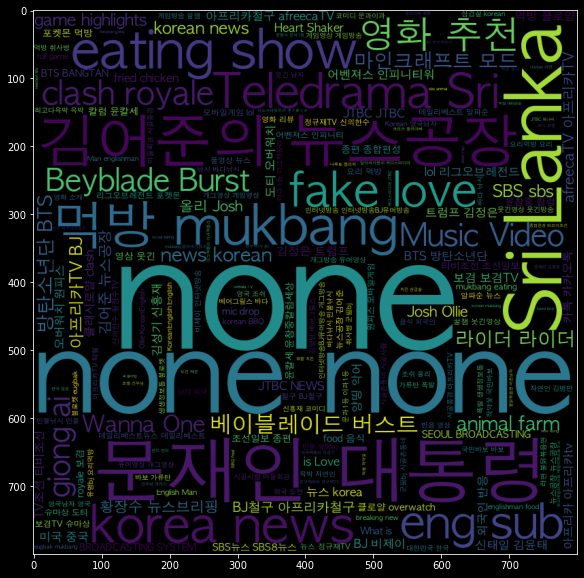

In [260]:
plt.figure(figsize=(10,10))
plt.imshow(
    array_tags,
    #interpolation='bilinear'
)
plt.show()

In [261]:
text_title = " ".join(df['title'])

In [262]:
keyword_title = wordcloud.generate(text_title)

In [263]:
array_title = keyword_title.to_array()

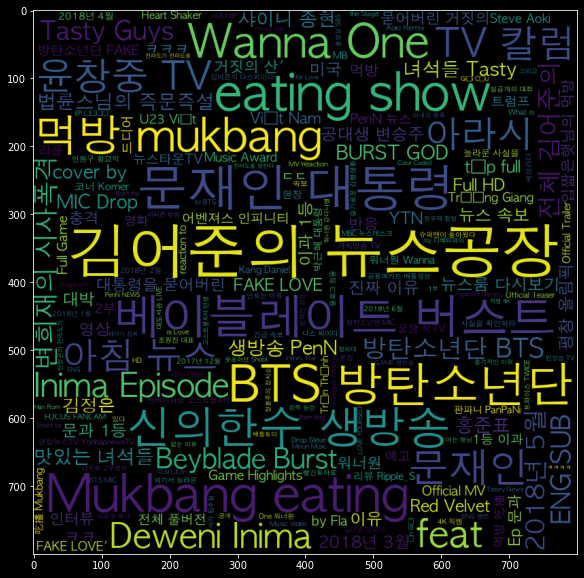

In [279]:
plt.figure(figsize=(10,10))
plt.imshow(array_title)
plt.show()

In [265]:
df.sort_values(by='views',ascending=False)

video_id                                              title  \
trending_date                                                                   
2017-12-11     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
2017-12-10     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
2017-12-06     6ZfuNTqbHE8  Marvel Studios' Avengers: Infinity War Officia...   
2018-05-24     7C2z4GqqS5E                BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV   
2017-12-05     6ZfuNTqbHE8  Marvel Studios' Avengers: Infinity War Officia...   
...                    ...                                                ...   
2017-12-11     xzrwNEV_8Gg                                        Îã§ÎãàÏóò ÏÉùÏùº Ï∂ïÌïòÌï¥!   
2018-03-06     Pj-QWzy4PsQ                       [ÌôçÏùµÏù∏Í∞Ñ Ïù∏ÏÑ±ÍµêÏú°] 7128Í∞ï ÏÇ∞Ïóê Îì§Ïñ¥Í∞ÄÍ≥† Ïã∂Îã§   
2018-02-27     3cdfrhklH_8                                  Ïï†ÏäêÎ¶¨ 18ÎÖÑÎèÑ Îî∏Í∏∞Ï∂ïÏ†ú ÏòÅÏÉÅ‚ù£   
2017-11-16     vWkMCsWwHYU        ÎßåÏ∑® Î∏åÏù¥Î°úÍ∑∏„Ö£ÏÑúÌîÑÎùºÏù¥Ï¶à ÏÉùÏùº ÌååÌã∞„Ö£Ïã§ÏãúÍ∞Ñ ÌòÑÏã§ Ïà†Ìåê„Ö£Ïó¨ÏûêÏÖã ÏùºÏÉÅ„Ö£ÏùºÏÉÅÎ∏åÏù¥Î°úÍ∑∏   
2017-11-19     36qc1QtE6bk                                    ÏÜåÏÖú Ïû†Í∏àÌôîÎ©¥ Ïï± (Îã¨Í≥†ÎÇò)   

                      channel_title  category_id              publish_time  \
trending_date                                                                
2017-12-11        YouTube Spotlight           24  2017-12-06T17:58:51.000Z   
2017-12-10        YouTube Spotlight           24  2017-12-06T17:58:51.000Z   
2017-12-06     Marvel Entertainment           24  2017-11-29T13:26:24.000Z   
2018-05-24                  ibighit           10  2018-05-18T09:00:02.000Z   
2017-12-05     Marvel Entertainment           24  2017-11-29T13:26:24.000Z   
...                             ...          ...                       ...   
2017-12-11            Ïó¨Î¶ÑÍ∞êÍ∏∞ from OSW           22  2017-12-10T12:20:41.000Z   
2018-03-06              jungbub2013           25  2018-03-05T20:31:15.000Z   
2018-02-27               ashley wow           24  2018-02-27T00:57:01.000Z   
2017-11-16                   ÏãúÎïåÎ©îÎùº _           22  2017-11-15T07:54:36.000Z   
2017-11-19                     ÎùΩÏ∫êÏä§Ìä∏           22  2017-11-17T08:18:01.000Z   

                                                            tags      views  \
trending_date                                                                 
2017-12-11     Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  113876217   
2017-12-10     Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  100911567   
2017-12-06     marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   87450245   
2018-05-24     BIGHIT|"ÎπÖÌûàÌä∏"|"Î∞©ÌÉÑÏÜåÎÖÑÎã®"|"BTS"|"BANGTAN"|"Î∞©ÌÉÑ"|"FAK...   87430865   
2017-12-05     marvel|"comics"|"comic books"|"nerdy"|"geeky"|...   84281319   
...                                                          ...        ...   
2017-12-11     kangdaniel|"daniel"|"Îã§ÎÖ§"|"fanmade"|"Îç∞Î∑îÏ†Ñ"|"pre-...       3268   
2018-03-06     Ï†ïÎ≤ï|"Ï†ïÎ≤ïÍ∞ïÏùò"|"ÏßÑÏ†ïÏä§ÏäπÎãò"|"Ï¶âÎ¨∏Ï¶âÏÑ§"|"Ï≤úÎ∂ÄÍ≤Ω"|"Ï†ïÎ≤ïÏãúÎåÄ"|"Ï†ïÎ≤ïÌÅ¥ÎüΩ"|"...       3124   
2018-02-27                                                [none]       2919   
2017-11-16     ÏùºÏÉÅÎ∏åÏù¥Î°úÍ∑∏|"ÏùºÏÉÅ"|"Î∏åÏù¥Î°úÍ∑∏"|"ÎßåÏ∑®Î∏åÏù¥Î°úÍ∑∏"|"ÎßåÏ∑®"|"ÌòÑÏã§Ïà†Ìåê"|"ÌòºÏà†"|"...       2623   
2017-11-19                                   Ïû†Í∑∏ÌôîÎ©¥|"ÏÜåÏÖú Ïû†Í∏àÌôîÎ©¥"|"ÏÜåÏÖú"       2050   

                 likes  dislikes  comment_count  \
trending_date                                     
2017-12-11     2811223   1470388         787174   
2017-12-10     2656686   1353663         682890   
2017-12-06     2584675     52176         341571   
2018-05-24     5150839    172570        1142274   
2017-12-05     2555414     51008         339708   
...                ...       ...            ...   
2017-12-11         333         0             10   
2018-03-06           0         0              0   
2018-02-27          10         4              1   


In [272]:
df.sort_values(by='views',ascending=False)[500:505]

video_id                                              title  \
trending_date                                                                   
2018-06-11     uID_f0W7vZQ  Nhanh Nh∆∞ Ch·ªõp | T·∫≠p 10 Full: Tr∆∞·ªùng Giang, Ha...   
2017-12-07     vcqImqOVE2U                         [MV] HyunA(ÌòÑÏïÑ) _ Lip & Hip   
2018-01-15     XcdLVKYsHHU                 EXO 'Electric Kiss' Dance Practice   
2018-01-21     7miowwmyhdI                                   „Ñπ„ÖáÎÇ¥ Ïó¨ÏûêÏπúÍµ¨ Í∞ú Ï©åÎäîÎìØ..   
2017-11-20     VD1QOLIhvzA  Gi·ªçng ·∫£i gi·ªçng ai 2 | t·∫≠p 7 full: Thu Th·ªßy, ∆Øn...   

                                    channel_title  category_id  \
trending_date                                                    
2018-06-11            ƒê√îNG T√ÇY PROMOTION OFFICIAL           24   
2017-12-07                           1theK (ÏõêÎçîÏºÄÏù¥)           10   
2018-01-15                                 SMTOWN           10   
2018-01-21                             Namsoon ÎÇ®Ïàú           22   
2017-11-20     DIEN QUAN Entertainment / Gi·∫£i Tr√≠           24   

                           publish_time  \
trending_date                             
2018-06-11     2018-06-09T14:50:05.000Z   
2017-12-07     2017-12-04T09:00:03.000Z   
2018-01-15     2018-01-13T03:00:01.000Z   
2018-01-21     2018-01-15T10:13:37.000Z   
2017-11-20     2017-11-18T13:15:13.000Z   

                                                            tags    views  \
trending_date                                                               
2018-06-11     dong tay promotion|"ƒë√¥ng t√¢y promotion"|"htv"|...  3298533   
2017-12-07     Kpop|"1theK"|"ÏõêÎçîÏºÄÏù¥"|"loen"|"Î°úÏóî"|"ÎÆ§ÎπÑ"|"Ìã∞Ï†∏"|"MV"...  3295581   
2018-01-15     EXO|"ÏóëÏÜå"|"ÏùºÎ†âÌä∏Î¶≠ÌÇ§Ïä§"|"Electric Kiss"|"ÏóëÏÜå ÏùºÎ≥∏"|"KPO...  3287432   
2018-01-21     ÎåÑÏä§|"cover"|"Ïó¨Ï∫†"|"Î¶¨Ïï°ÏÖò"|"Ïò§Îπ†Ïïº"|"Ïù¥ÏÑ§"|"ÍπÄÏù¥Î∏åÎãò"|"Ïú∞Îåï"|"...  3282028   
2017-11-20     Gi·ªçng ·∫£i gi·ªçng ai|"giong ai giong ai"|"tran th...  3280361   

                likes  dislikes  comment_count  \
trending_date                                    
2018-06-11      16754      2027           4220   
2017-12-07     150930      9511          14370   
2018-01-15     396301      2203          32894   
2018-01-21      12691      4181           3124   
2017-11-20      12863      1527           4594   

                                               thumbnail_link  \
trending_date                                                   
2018-06-11     https://i.ytimg.com/vi/uID_f0W7vZQ/default.jpg   
2017-12-07     https://i.ytimg.com/vi/vcqImqOVE2U/default.jpg   
2018-01-15     https://i.ytimg.com/vi/XcdLVKYsHHU/default.jpg   
2018-01-21     https://i.ytimg.com/vi/7miowwmyhdI/default.jpg   
2017-11-20     https://i.ytimg.com/vi/VD1QOLIhvzA/default.jpg   

               comments_disabled  ratings_disabled  video_error_or_removed  \
trending_date                                                                
2018-06-11                 False             False                   False   
2017-12-07                 False             False                   False   
2018-01-15                 False             False                   False   
2018-01-21                 False             False                   False   
2017-11-20                 False             False                   False   

                                                     description  
trending_date                                                     
2018-06-11     HTV Nhanh Nh∆∞ Ch·ªõp | T·∫≠p 10 Full: D√π C√≥ Hai Co...  
2017-12-07     [MV] HyunA(ÌòÑÏïÑ) _ Lip & Hip\n\n*English subtitl...  
2018-01-15     EXO's 1st full album in Japan \n\nEXO's 1st fu...  
2018-01-21     #ÎÇ®Ïàú #ÏÑúÏú§ #ÎÇ®ÏÑúÏú§ #ÏïºÎ∞©Îç∞Ïù¥Ìä∏ #Îç∞Ïù¥Ìä∏\n\nÏïÑÌîÑÎ¶¨Ïπ¥TV Î∞©ÏÜ°Íµ≠‚ô• http:/...  
2017-11-20     Gi·ªçng ·∫£i gi·ªçng ai t·∫≠p 7 v·ªõi s·ª± xu·∫•t hi·ªán c·ªßa 2...

In [275]:
text_title_top500 = " ".join(list(df.sort_values(by='views',ascending=False)['title'])[:500])

In [276]:
keyword_title_top500 = wordcloud.generate(text_title_top500)

In [277]:
array_title_top500 = keyword_title_top500.to_array()

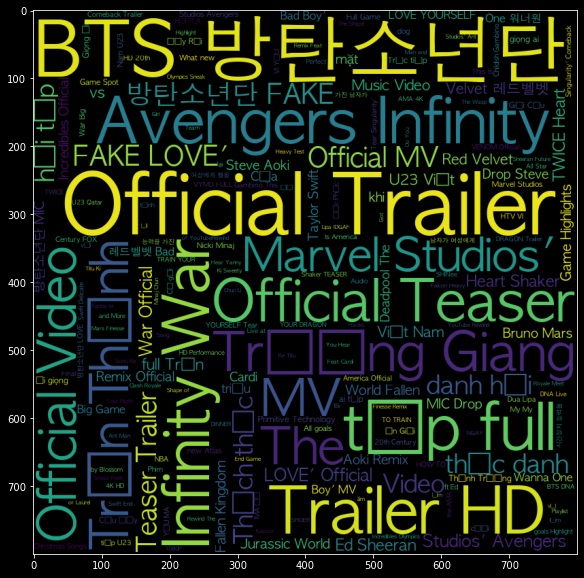

In [287]:
plt.figure(figsize=(10,10))
plt.imshow(array_title_top500)
plt.show()

In [280]:
text_tags_top500 = " ".join(list(df.sort_values(by='views',ascending=False)['tags'])[:500])

In [281]:
keyword_tags_top500 = wordcloud.generate(text_tags_top500)

In [282]:
array_tags_top500 = keyword_tags_top500.to_array()

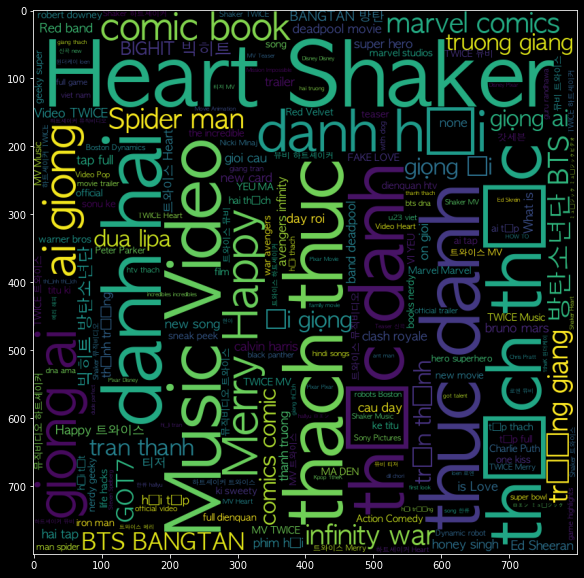

In [298]:
plt.figure(figsize=(10,10))
plt.imshow(array_tags_top500)
plt.show()